## Aprendizaje Automático Supervisado

## 3º GrIA, USC

# Práctica 2: Máquinas de Vectores de Soporte

Este fichero Notebook contiene la solución del siguiente equipo al guion de prácticas proporcionado en el Aula Virtual de la asignatura.

Miembros del equipo:
- _Estudiante1_: Mateo, Fraguas Abal
- _Estudiante2_: Álvaro, Garnelo Luaces
- _Estudiante3_: Karol, Badura

# 0. Instalación de Paquetes

Escribe en la siguiente celda de código las instrucciones necesarias para cargar los paquetes de Python que necesitéis

In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold, GridSearchCV
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, LeaveOneOut, GridSearchCV, cross_val_score, StratifiedKFold
from sklearn.metrics import accuracy_score, cohen_kappa_score, balanced_accuracy_score, confusion_matrix, ConfusionMatrixDisplay

from matplotlib.lines import Line2D
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.metrics import f1_score 

Además, para garantizar la reproducibilidad de resultados vamos a fijar una semilla que se use con todos los algoritmos que tengan alguna componente no determinista (**no cambies el código de la siguiente celda**).

In [3]:
# Definir semilla
SEMILLA = 1492
np.random.seed(SEMILLA)

# 1. Estudio guiado

Escribe en las siguientes celdas de código las instrucciones necesarias para cargar los conjuntos de datos (ficheros csv) proporcionados en el Aula Virtual. Para la construcción y el análisis de los datos podéis añadir las celdas que necesitéis.

## 1.1 Problema separable linealmente

>a. Cargad en memoria el Dataset 1 (“dataset_1.csv”) e inspeccionad brevemente sus propiedades.

In [4]:
dataset_1 = pd.read_csv("dataset_1.csv")
print(dataset_1.shape)
dataset_1.head()

(100, 3)


,x1,x2,y
0,-0.581066,0.841837,0
1,-0.894309,-0.207835,0
2,-1.207552,0.212034,0
3,-1.364174,0.002099,0
4,-0.737687,1.051772,0


### Dataset 1
Tamaño 100x3, 100 puntos en coordenadas x1 y x2.

> b. Dibujad  la  nube  de  puntos  en  un  gráfico  de  dispersión  coloreando  cada  ejemplo  de  datos  en función de su clase. 

In [12]:
def plot_manual(data,m=None,C=None):
    plt.figure(figsize=(8, 6))
    plt.title('Nube de puntos')
    sns.scatterplot(data = data,x='x1', y='x2', hue='y')
    plt.axhline(0,color='black',linewidth=0.5,linestyle='--')
    plt.axvline(0,color='black',linewidth=0.5,linestyle='--')
    if m !=None and C != None:
        x_vals = np.linspace(min(data['x1']), max(data['x1']), 100)
        y_vals = m * x_vals + C
        plt.plot(x_vals, y_vals, "k--", label=f"Hiperplano manual\nm: y = {m}x + {C}")
        plt.legend()
    plt.show()

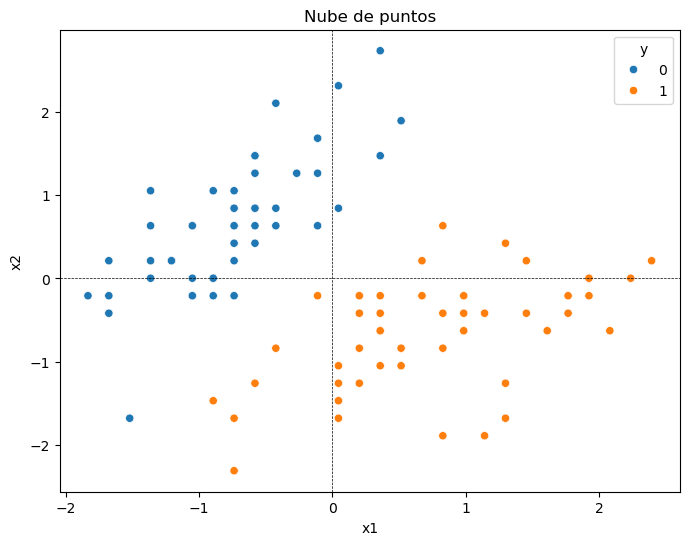

In [6]:
plot_manual(dataset_1)

> c. Tratad de dibujar sobre el gráfico anterior algún hiperplano que separe los datos en función de su clase con una tasa de acierto del 100%.

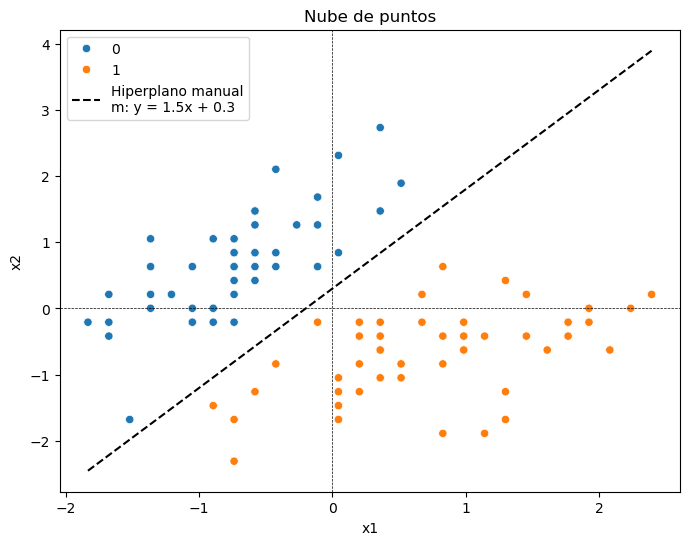

In [8]:
plot_manual(dataset_1, m=1.5, C=0.3)

> d. Entrenad  una  SVM  con  todo  el  conjunto  de  datos.  Utilizad  para  ello  la  función  svm.SVC()  con  kernel lineal. Usad una C=100.0 y dejad los demás hiperparámetros con sus valores por defecto. Comprobad que la SVM tiene un 100% de precisión sobre los datos de entrenamiento.

In [7]:
X = dataset_1[["x1", "x2"]]
y = dataset_1["y"]

svm = SVC(kernel='linear', C=100, random_state=SEMILLA)
svm.fit(X, y)

y_pred = svm.predict(X)
accuracy = accuracy_score(y, y_pred)
print(f'Precisión sobre los datos de entrenamiento: {accuracy * 100:.2f}')

Precisión sobre los datos de entrenamiento: 100.00


> e. Dibujad de nuevo la nube de puntos, pero esta vez añadid el hiperplano aprendido por la SVM y sus  márgenes.  Si  queréis,  también  podéis  pintar  cada  lado  del  hiperplano  con  un color  distinto  para  que  quede  bien  claro  cuáles  son  las  fronteras  de  decisión.  Finalmente,  marcad de  algún modo cuáles son los vectores de soporte.

In [13]:
def plot_svm(data,svm):
    precision = svm.score(X,y)
    print(f"Precisión: {precision*100:.2f}")
    w = svm.coef_[0]
    b = svm.intercept_[0]
    
    x_vals = np.linspace(min(data['x1']), max(data['x1']), 100)
    y_hiperplano = -(w[0] / w[1]) * x_vals - b / w[1]
    
    
    plt.figure(figsize=(8, 6))
    
    sns.scatterplot(data = data,x='x1', y='x2', hue='y')
    plt.axhline(0,color='black',linewidth=0.5,linestyle='--')
    plt.axvline(0,color='black',linewidth=0.5,linestyle='--')
    
    plt.plot(x_vals, y_hiperplano, "k-", label="Hiperplano")
    plt.plot(x_vals, y_hiperplano + 1 / w[1], "r--", label="Márgen positivo")
    plt.plot(x_vals, y_hiperplano - 1 / w[1], "r--", label="Márgen negativo")
    
    plt.scatter(
        svm.support_vectors_[:, 0],
        svm.support_vectors_[:, 1],
        s=100,
        facecolors="none",
        edgecolors="k",
        label="Vectores de soporte"
    )
    plt.title("Hiperplano aprendido por la SVM")
    plt.legend()
    plt.show()


Precisión: 100.0


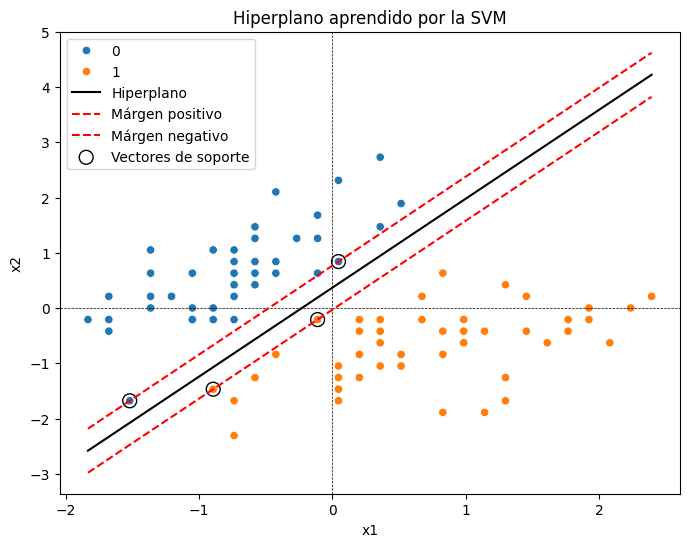

In [9]:
plot_svm(dataset_1, svm)

> f. Repetid  los  pasos  d.  -  e.,  pero  esta  vez  con  C=1.0.  Analizad  las  diferencias  y  explicad  el  impacto del hiperparámetro C en el proceso de aprendizaje. 

In [10]:
svm_1 = SVC(kernel='linear', C=1, random_state=SEMILLA)
svm_1.fit(X, y)

y_pred = svm_1.predict(X)
accuracy = accuracy_score(y, y_pred)
print(f'Precisión sobre los datos de entrenamiento: {accuracy * 100:.2f}')

Precisión sobre los datos de entrenamiento: 99.00


Precisión: 99.0


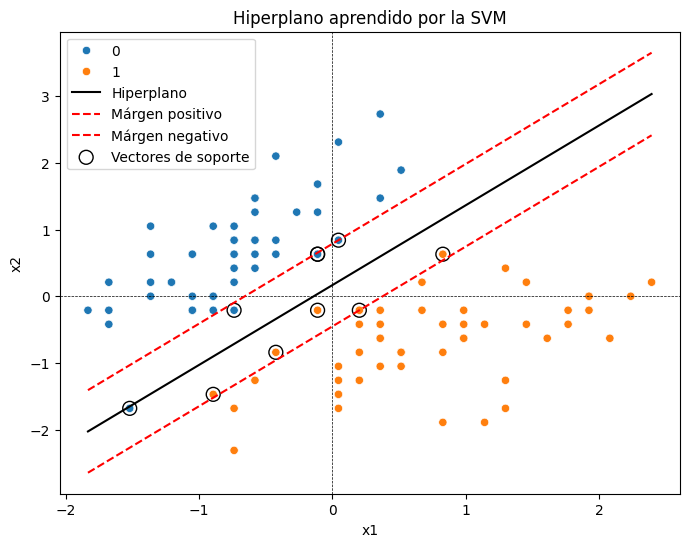

In [11]:
plot_svm(dataset_1, svm_1)

## 1.2. Problema cuasi-separable linealmente

> g. Cargad el Dataset 2 e inspeccionadlo. 

In [12]:
dataset_2 = pd.read_csv("dataset_2.csv")

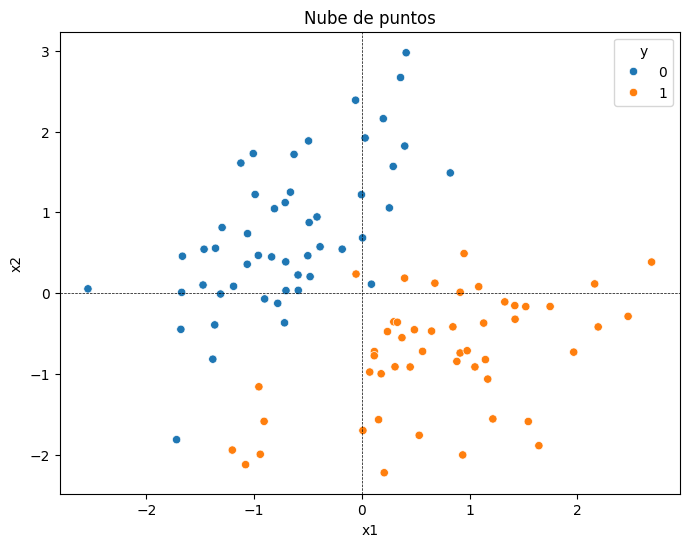

In [13]:
plot_manual(dataset_2)

> Entrenad  una  SVM  con  kernel  lineal.  Estimad  el  valor  óptimo  de  C  mediante  alguna  técnica  de  validación cruzada. 

In [14]:
def get_best_c(dataset):
    svc = SVC(kernel='linear', random_state=SEMILLA)
    X = dataset[["x1", "x2"]]
    y = dataset["y"]

    parametros={'C':[i*0.1 for i in range(1,1000)]}

    grid_search = GridSearchCV(
        estimator=svc,
        param_grid=parametros,
        cv=5,  
        verbose=1  # Muestra el progreso
    )
    grid_search.fit(X, y)

    best_C = grid_search.best_params_['C']

    print(f"Mejor valor de C: {best_C:.1f}")
    print(f"Mejor puntuación de validación cruzada: {grid_search.best_score_ * 100:.2f}%")
    return best_C


In [39]:
mejor_C = get_best_c(dataset_2)

Fitting 5 folds for each of 999 candidates, totalling 4995 fits
Mejor valor de C: 0.6
Mejor puntuación de validación cruzada: 99.00%


> Representad gráficamente el mejor ajuste alcanzado. 

Precisión: 99.0


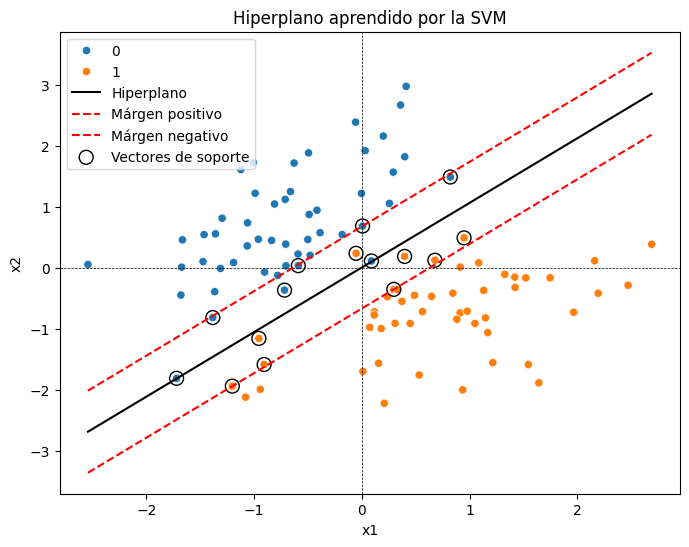

In [16]:
svm_best = SVC(kernel='linear', C=mejor_C, random_state=SEMILLA)
X = dataset_2[["x1", "x2"]]
y = dataset_2["y"]
svm_best.fit(X, y)
plot_svm(dataset_2, svm_best)

## 1.3. Problema no separable linealmente (I)

> Cargad el Dataset 3 (“dataset_3.csv”) y visualizad su nube de puntos. 

In [9]:
dataset_3 = pd.read_csv("dataset_3.csv")

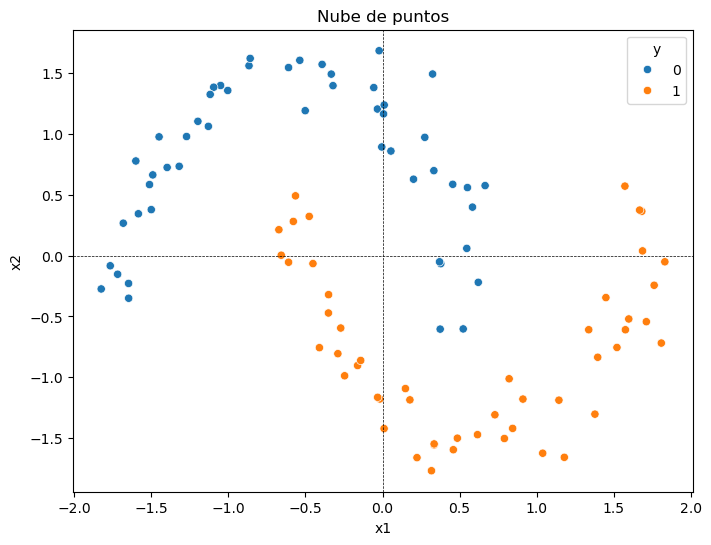

In [10]:
plot_manual(dataset_3)

> Tratad de ajustar una SVM con kernel lineal.  

In [15]:
X = dataset_3[["x1", "x2"]]
y = dataset_3["y"]


mejor_C = get_best_c(dataset_3)
svm_best = SVC(kernel='linear', C=mejor_C, random_state=SEMILLA)
svm_best.fit(X, y)

print(f"Precisión del modelo: {svm_best.score(X,y)*100}%")

Fitting 5 folds for each of 999 candidates, totalling 4995 fits
Mejor valor de C: 0.1
Mejor puntuación de validación cruzada: 87.00%
Precisión del modelo: 87.0%


> Probad ahora con  un  kernel polinómico. Emplead  un  polinomio de  grado  3  y un  término independiente mayor que 0. Podéis fijar C=100.0.

In [16]:
svm_poli = SVC(kernel='poly', degree=3, C=100, coef0=0.1, random_state=SEMILLA)
X = dataset_3[["x1", "x2"]]
y = dataset_3["y"]
svm_poli.fit(X, y)
print(f"Precisión del modelo: {svm_poli.score(X,y)*100}%")

Precisión del modelo: 100.0%


> Visualizad  y  comparad  los  ajustes  de  los  modelos  construidos  en  los  pasos  k.  y  l.  Analizad  el funcionamiento del kernel polinómico y su impacto en los resultados.

In [28]:
def plot_svm_poly(data, svm,p=None):
    print(f"Precisión del modelo: {svm.score(X,y)*100:.2f}%")
    x_min, x_max = data["x1"].min() - .1, data["x1"].max() + .1
    y_min, y_max = data["x2"].min() - .1, data["x2"].max() + .1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 500),
                         np.linspace(y_min, y_max, 500))

    if p!=None:
        # Crear DataFrame para predicción
        grid_points = np.c_[xx.ravel(), yy.ravel()]
        grid_df = pd.DataFrame(grid_points, columns=["x1", "x2"])
        
        # Predecir valores en cada punto de la cuadrícula
        decision_values = svm.decision_function(grid_df)
        Z = decision_values.reshape(xx.shape)
    else:
        Z = svm.predict(np.c_[xx.ravel(), yy.ravel()])
        Z = Z.reshape(xx.shape)
    
    # Graficar las regiones de decisión
    plt.figure(figsize=(10, 8))
    plt.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.Paired)
    plt.contour(xx, yy, Z, levels=[-1, 0, 1], linestyles=['--', '-', '--'], colors='black', linewidths=1)
    
    # Graficar puntos y vectores de soporte
    sns.scatterplot(data=data, x='x1', y='x2', hue='y')
    plt.axhline(0, color='black', linewidth=0.5, linestyle='--')
    plt.axvline(0, color='black', linewidth=0.5, linestyle='--')
    
    plt.scatter(
        svm.support_vectors_[:, 0],
        svm.support_vectors_[:, 1],
        s=100,
        facecolors='none',
        edgecolors='k',
        label='Vectores de soporte'
    )

    margin_handle = Line2D(
        [0], [0],
        linestyle='--',
        color='black',
        label='Margen'
    )

    handles, labels = plt.gca().get_legend_handles_labels()
    handles.append(margin_handle)
    labels.append('Márgen')
    
    if p!=None:
        plt.title(f"Fronteras de decisión con kernel polinómico (grado={p})")
    else:
        plt.title("Fronteras de decisión con kernel radial")
        
    plt.legend(handles, labels)
    plt.show()


Precisión: 87.00


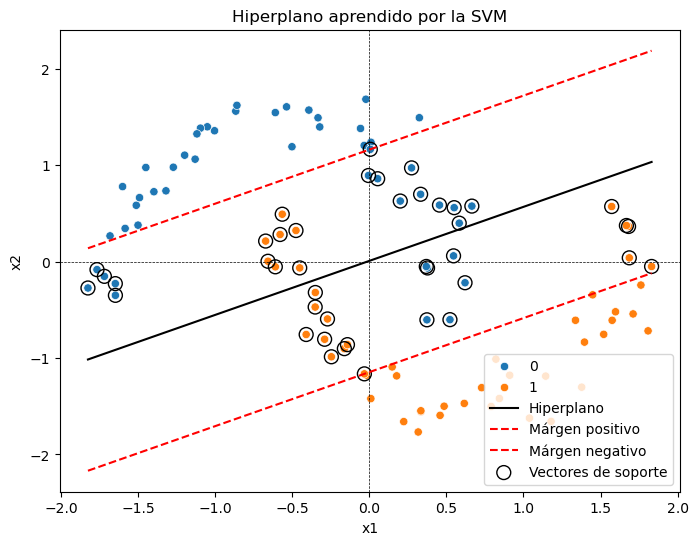

In [18]:
plot_svm(dataset_3, svm_best)

Precisión del modelo: 100.00%


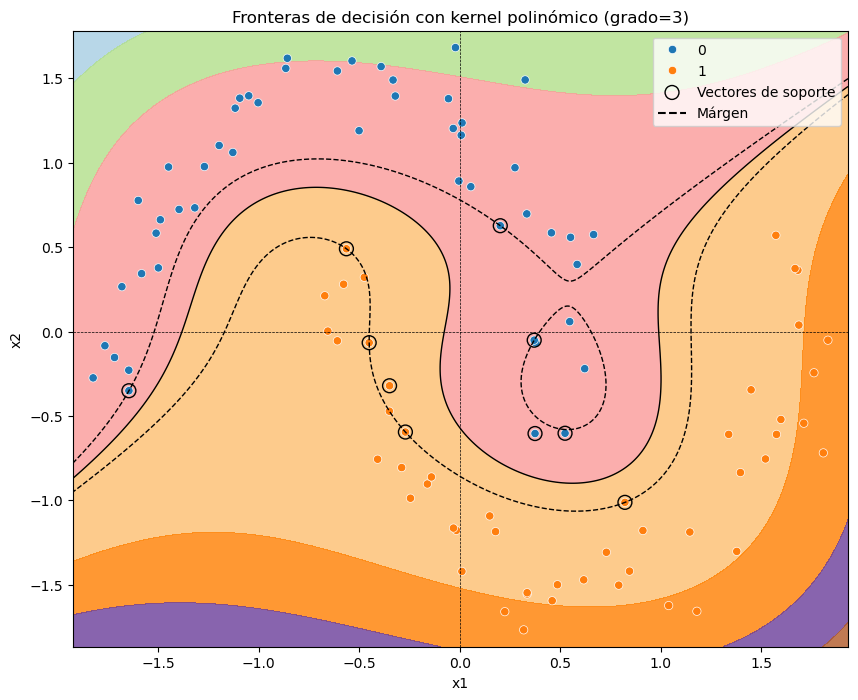

In [29]:
plot_svm_poly(dataset_3, svm_poli, p=3)

## 1.4. Problema no separable linealmente (II)

> Cargad el Dataset 4 (“dataset_4.csv”) y visualizad su nube de puntos. 

In [30]:
dataset_4 = pd.read_csv("dataset_4.csv")

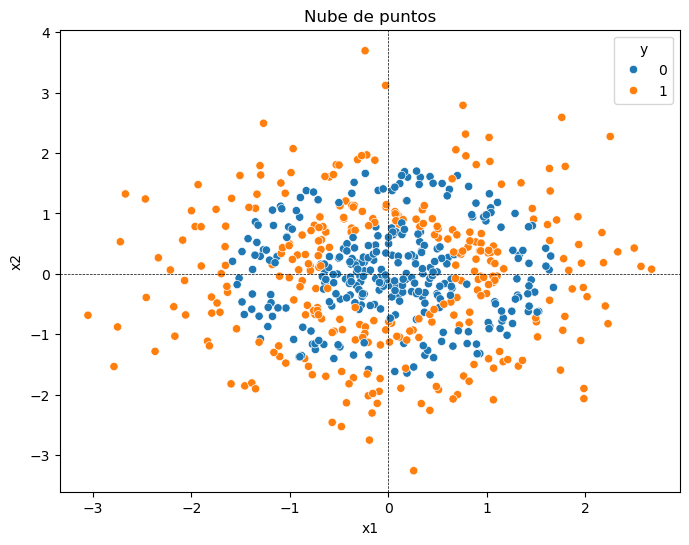

In [31]:
plot_manual(dataset_4)

> Tratad de ajustar una SVM con kernel lineal o polinómico.  

Fitting 5 folds for each of 999 candidates, totalling 4995 fits
Mejor valor de C: 3.7
Mejor puntuación de validación cruzada: 55.50%
Precisión: 57.83


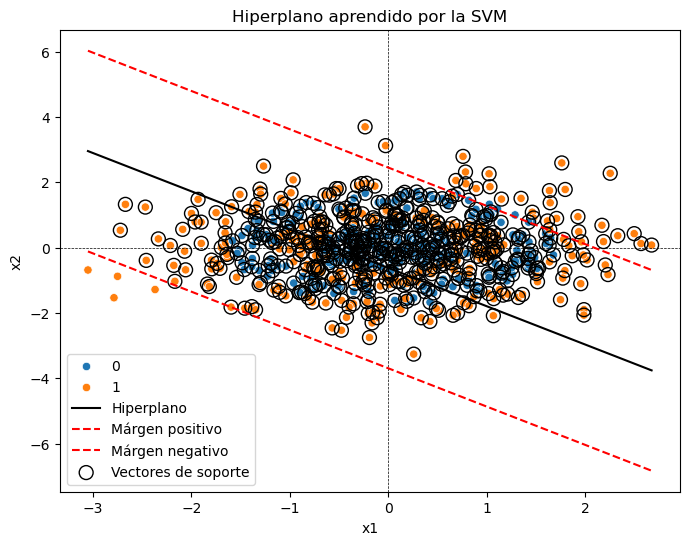

In [32]:
X = dataset_4[["x1", "x2"]]
y = dataset_4["y"]

mejor_C = get_best_c(dataset_4)
svm_best = SVC(kernel='linear', C=mejor_C, random_state=SEMILLA)
svm_best.fit(X, y)
plot_svm(dataset_4, svm_best)

Precisión del modelo: 61.00%


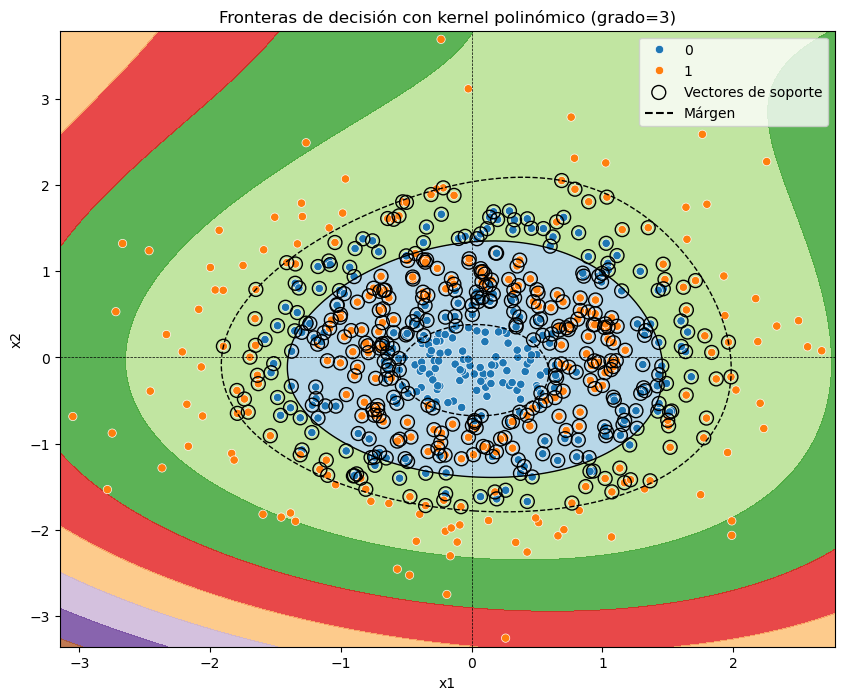

In [33]:
svm_poli = SVC(kernel='poly', degree=3, C=100, coef0=0.5, random_state=SEMILLA)
svm_poli.fit(X, y)
plot_svm_poly(dataset_4, svm_poli, p=3)

> p. Probad ahora con un kernel de base radial. Podéis emplear C=100.0 y dejar los demás hiperparámetros con sus valores por defecto.

Precisión del modelo: 91.33%


/home/mateo/cosas_de_clase/4/vpc/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


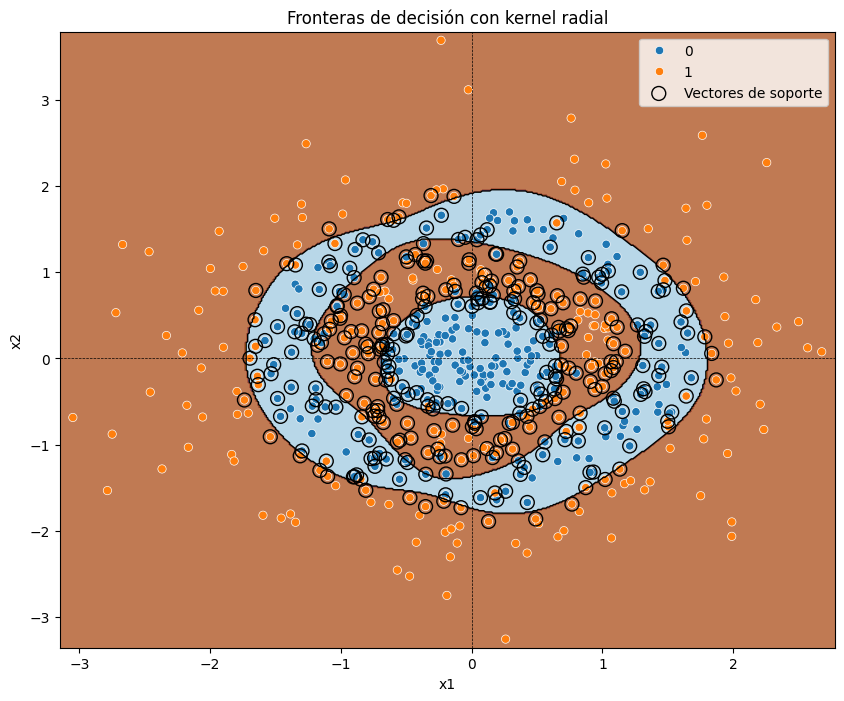

In [61]:
svm_radial = SVC(kernel='rbf', C=100, random_state=SEMILLA)
svm_radial.fit(X, y)
plot_svm_poly(dataset_4, svm_radial)

> Analizad el funcionamiento del kernel de base radial y su impacto en los resultados. 

El kernel radial ...

# 2. Caso práctico

## 2.1 Preprocesado

In [34]:
# === CARGAMOS LOS DATASETS ===
df1 = pd.read_csv("breast-cancer-train.csv")
df2 = pd.read_csv("adult-train.csv")

In [35]:
# === PREPROCESADO DE LOS DATOS === 
df1 = df1.drop_duplicates() 
df2 = df2.drop_duplicates()
X1 = df1.drop(columns=['id', 'diagnosis']) 
y1 = df1['diagnosis'].map({'M': 0, 'B': 1})
X2 = df2.drop(columns=['outputClass']) 
y2 = df2['outputClass'].map({'<=50K': 1, '>50K': 0})
X2 = X2.drop(columns=['workclass', 'occupation', "nativeCountry"])

# GESTIÓN DE VALORES FALTANTES
imputer = SimpleImputer(strategy='mean')
df_imputed_array = imputer.fit_transform(X1)
X1_mean = pd.DataFrame(df_imputed_array, columns=X1.columns)

# CODIFICACIÓN DE LAS VARIABLES CATEGÓRICAS
le = LabelEncoder()
categories = X2.select_dtypes(include=['object']).columns
for col in categories:
    X2[col] = le.fit_transform(X2[col])
    
# NORMALIZACIÓN
scaler = MinMaxScaler()
X1_norm = scaler.fit_transform(X1_mean)
X2_norm = scaler.fit_transform(X2)

In [36]:
X1_train, X1_test, y1_train, y1_test = train_test_split(
    X1_norm, y1, test_size=0.2, stratify=y1, random_state=1492
)

X2_train, X2_test, y2_train, y2_test = train_test_split(
    X2_norm, y2, test_size=0.2, stratify=y2, random_state=1492
)

## FUNCIÓN PARA EL ANÁLISIS Y ELECCIÓN DEL KERNEL

In [37]:

def SVM_analisis(X_train, y_train, X_test, y_test, param_grid):
    grid = GridSearchCV(SVC(), param_grid, cv=5)
    grid.fit(X_train, y_train)
    print("MEJOR RESULTADO:")
    print(grid.best_score_,grid.best_params_)
    
    # MOSTRAR MEJOR ACCURACY EN VALIDACIÓN DE CADA KERNEL
    resultados = pd.DataFrame(grid.cv_results_)
    best_acc_kernel = resultados.groupby('param_kernel')['mean_test_score'].max()
    plt.bar(best_acc_kernel.index, best_acc_kernel.values, color=['#4C72B0', '#55A868', '#C44E52'])
    plt.title("Mejor accuracy promedio por kernel")
    plt.xlabel("Kernel")
    plt.ylabel("Accuracy (validación cruzada)")
    for i, v in enumerate(best_acc_kernel.values):
        plt.text(i, v - 0.10, f"{v:.3f}", ha='center')
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.show()


    # REGLA DE 1 DESVIACIÓN
    threshold = grid.best_score_ - resultados.loc[grid.best_index_, 'std_test_score']
    modelos_simples = resultados[resultados['mean_test_score'] >= threshold].copy()
    modelos_simples['kernel_rank'] = modelos_simples['param_kernel'].map({'linear': 0, 'poly': 1, 'rbf': 2})
    modelos_simples = modelos_simples.sort_values(by=['kernel_rank', 'param_C', 'param_degree', 'param_gamma'],ascending=[True, True, True, True])
    modelo_mas_simple = modelos_simples.iloc[0]

    # ENTRENO EL MODELO MÁS SIMPLE Y LO EVALUO
    clf = SVC(kernel=modelo_mas_simple['param_kernel'], C=modelo_mas_simple['param_C'], gamma=modelo_mas_simple['param_gamma'], degree=modelo_mas_simple['param_degree'], coef0=modelo_mas_simple.get('param_coef0', 0.0))
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    
    accuracy_test = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='weighted')
    print("MÉTRICAS EN TEST:")
    print(f"Accuracy: {accuracy_test:.4f}")
    print(f"F1-score: {f1:.4f}")
    
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot(cmap='Blues')
    plt.title("Matriz de confusión")
    plt.show()


    return modelo_mas_simple, accuracy_test


## 2.2 Breast Cancer

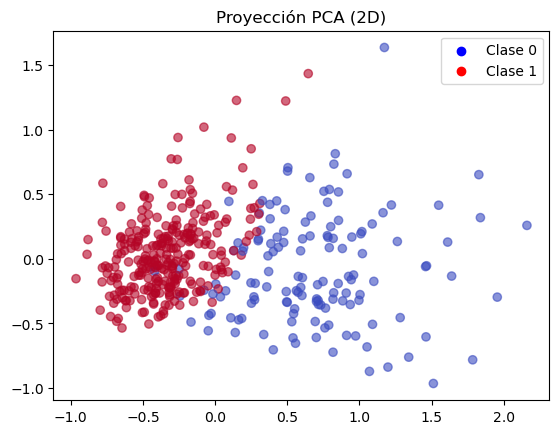

In [38]:
# === EXPLORACIÓN DE LOS DATOS CON PCA ===
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X1_norm)

plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y1, cmap='coolwarm', alpha=0.6)
plt.title('Proyección PCA (2D)')
plt.scatter([], [], c='blue', label='Clase 0')
plt.scatter([], [], c='red', label='Clase 1')
plt.legend()
plt.show()


MEJOR RESULTADO:
0.982089552238806 {'C': 0.1, 'coef0': 1.0, 'degree': 3, 'gamma': 'scale', 'kernel': 'poly'}


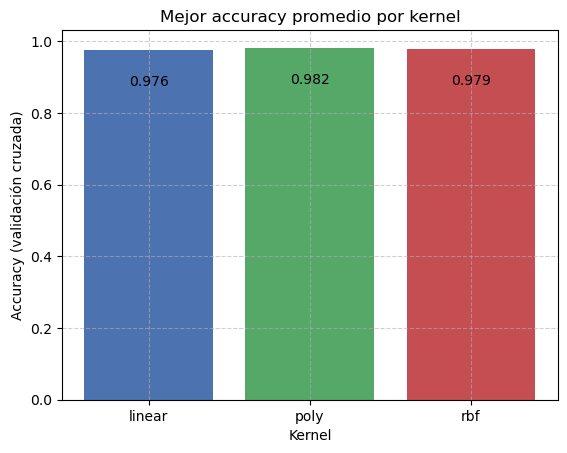

MÉTRICAS EN TEST:
Accuracy: 0.9524
F1-score: 0.9513


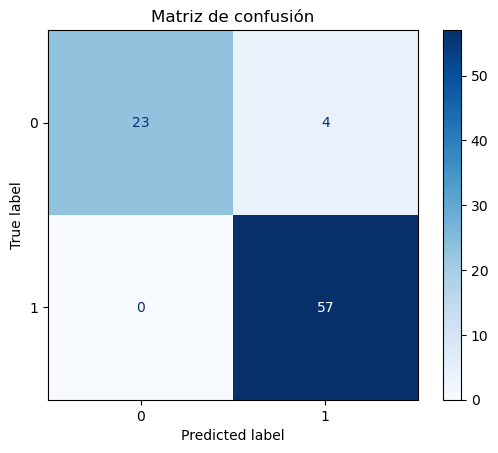

MODELO MAS SIMPLE:
{'C': 1, 'coef0': 0.0, 'degree': 2, 'gamma': 0.001, 'kernel': 'linear'}


In [22]:
param_grid = {
    'kernel': ['linear', 'rbf', 'poly'],
    'C': [0.01, 0.1, 1, 10, 100],
    'gamma': ['scale', 'auto', 0.001, 0.01, 0.1, 1],
    'degree': [2, 3, 4],
    'coef0': [0.0, 0.5, 1.0] 
}

m, a = SVM_analisis(X1_train, y1_train, X1_test, y1_test, param_grid)
print("MODELO MAS SIMPLE:")
print(m.params)

## 2.2. Adult

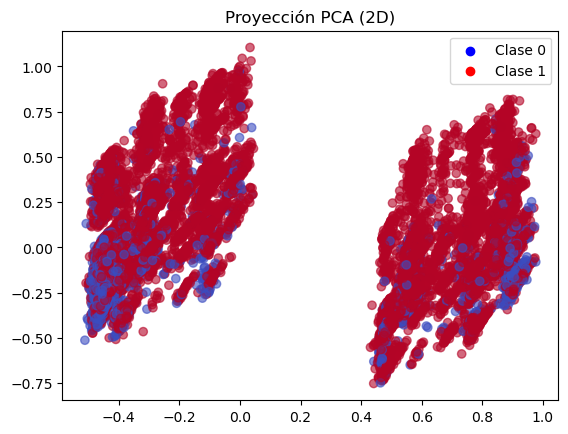

In [39]:
# === EXPLORACIÓN DE LOS DATOS CON PCA ===
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X2_norm)

plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y2, cmap='coolwarm', alpha=0.6)
plt.title('Proyección PCA (2D)')
plt.scatter([], [], c='blue', label='Clase 0')
plt.scatter([], [], c='red', label='Clase 1')
plt.legend()
plt.show()


In [32]:
# === COMPROBAMOS QUE EL KERNEL LINEAL NO RINDE BIEN ===
param_grid = {'C': [0.01, 0.1, 1, 10]}
svm = SVC(kernel='linear')
grid = GridSearchCV(svm, param_grid, cv=5)
grid.fit(X2_train, y2_train)
print("Mejores parámetros:", grid.best_params_)
print("Accuracy media (CV):", grid.best_score_)

Mejores parámetros: {'C': 1}
Accuracy media (CV): 0.8151674691472154


MEJOR RESULTADO:
0.8460178549615588 {'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}


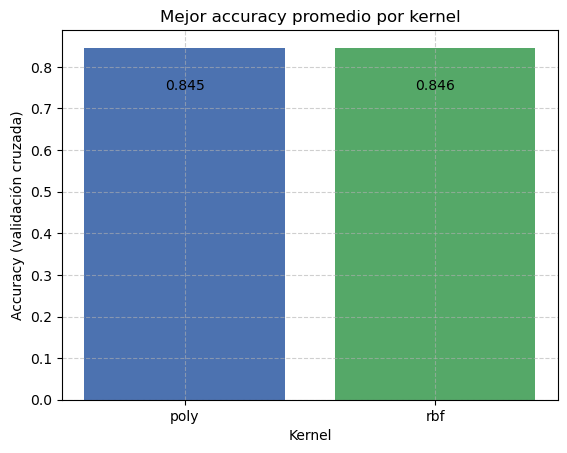

MÉTRICAS EN TEST:
Accuracy: 0.8486
F1-score: 0.8395


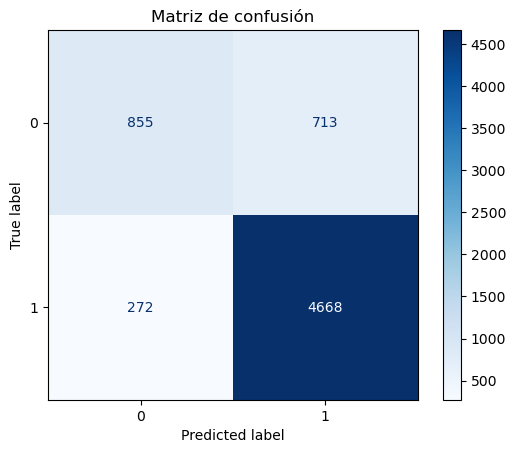

MODELO MAS SIMPLE:
{'C': 1, 'coef0': 0.0, 'degree': 2, 'gamma': 'scale', 'kernel': 'poly'}


In [7]:
param_grid = [
    {  'kernel': ['rbf'],
        'C': [0.1, 1, 10],
        'gamma': ['scale', 0.01, 0.1]},
    {  'kernel': ['poly'],
        'C': [1, 10],
        'degree': [2, 3],
        'gamma': ['scale'],
        'coef0': [0.0, 1.0]}
]

m, a = SVM_analisis(X2_train, y2_train, X2_test, y2_test, param_grid)
print("MODELO MAS SIMPLE:")
print(m.params)